We are going to re-create a FiveThirtyEight analysis for this assignment.

The data can be found here:  

[https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv](https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv)

Using the data, re-create this figure from the article:

<img src="https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png" style="width: 500px" />

In [1]:
# load libraries
library('tidyverse')
library('forcats')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# get data
df = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  EPISODE = col_character(),
  TITLE = col_character()
)

See spec(...) for full column specifications.



In [3]:
# preview data
head(df, n=10)


EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,⋯,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0
S01E06,"""WINTER MOON""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E07,"""AUTUMN MOUNTAINS""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0
S01E08,"""PEACEFUL VALLEY""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E09,"""SEASCAPE""",0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
# make a copy of the df to work with
df2 = df

In [5]:
# pivot_longer

df3 = df2 %>%
        pivot_longer(-c(EPISODE,TITLE), names_to="subject", values_to="subject_count")

head(df3, n=20)

EPISODE,TITLE,subject,subject_count
<chr>,<chr>,<chr>,<dbl>
S01E01,"""A WALK IN THE WOODS""",APPLE_FRAME,0
S01E01,"""A WALK IN THE WOODS""",AURORA_BOREALIS,0
S01E01,"""A WALK IN THE WOODS""",BARN,0
S01E01,"""A WALK IN THE WOODS""",BEACH,0
S01E01,"""A WALK IN THE WOODS""",BOAT,0
S01E01,"""A WALK IN THE WOODS""",BRIDGE,0
S01E01,"""A WALK IN THE WOODS""",BUILDING,0
S01E01,"""A WALK IN THE WOODS""",BUSHES,1
S01E01,"""A WALK IN THE WOODS""",CABIN,0


In [6]:
# convert subject variable into a factor
df3 = mutate(df3, subject_factor=factor(df3$subject))
head(df3, n=10)

EPISODE,TITLE,subject,subject_count,subject_factor
<chr>,<chr>,<chr>,<dbl>,<fct>
S01E01,"""A WALK IN THE WOODS""",APPLE_FRAME,0,APPLE_FRAME
S01E01,"""A WALK IN THE WOODS""",AURORA_BOREALIS,0,AURORA_BOREALIS
S01E01,"""A WALK IN THE WOODS""",BARN,0,BARN
S01E01,"""A WALK IN THE WOODS""",BEACH,0,BEACH
S01E01,"""A WALK IN THE WOODS""",BOAT,0,BOAT
S01E01,"""A WALK IN THE WOODS""",BRIDGE,0,BRIDGE
S01E01,"""A WALK IN THE WOODS""",BUILDING,0,BUILDING
S01E01,"""A WALK IN THE WOODS""",BUSHES,1,BUSHES
S01E01,"""A WALK IN THE WOODS""",CABIN,0,CABIN


In [7]:
df4 = df3 %>%  group_by(subject) %>%
            summarize(total=sum(subject_count))

head(df4)

subject,total
<chr>,<dbl>
APPLE_FRAME,1
AURORA_BOREALIS,2
BARN,17
BEACH,27
BOAT,2
BRIDGE,7


In [8]:
# use forcats to order factors and to lump together every subject less than top 10
df5 = df4 %>% mutate(subject=fct_infreq(subject)  %>%
                    fct_lump(subject, n=10) %>% fct_rev)


head(df5, n=25)


subject,total
<fct>,<dbl>
APPLE_FRAME,1
AURORA_BOREALIS,2
BARN,17
BEACH,27
BOAT,2
BRIDGE,7
BUILDING,1
BUSHES,120
CABIN,69


Warning message:
“Ignoring unknown aesthetics: stat”


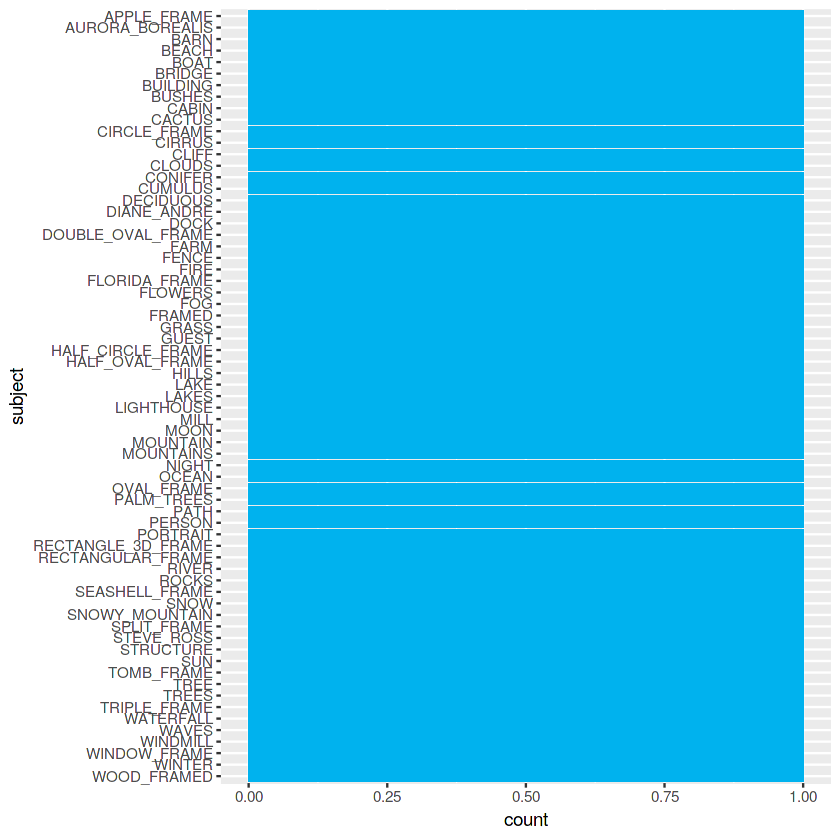

In [9]:
p = ggplot(df5, aes(x = subject))

p = p + geom_bar(aes(x = subject, stat='identity'), fill='deepskyblue2') + coord_flip()

p




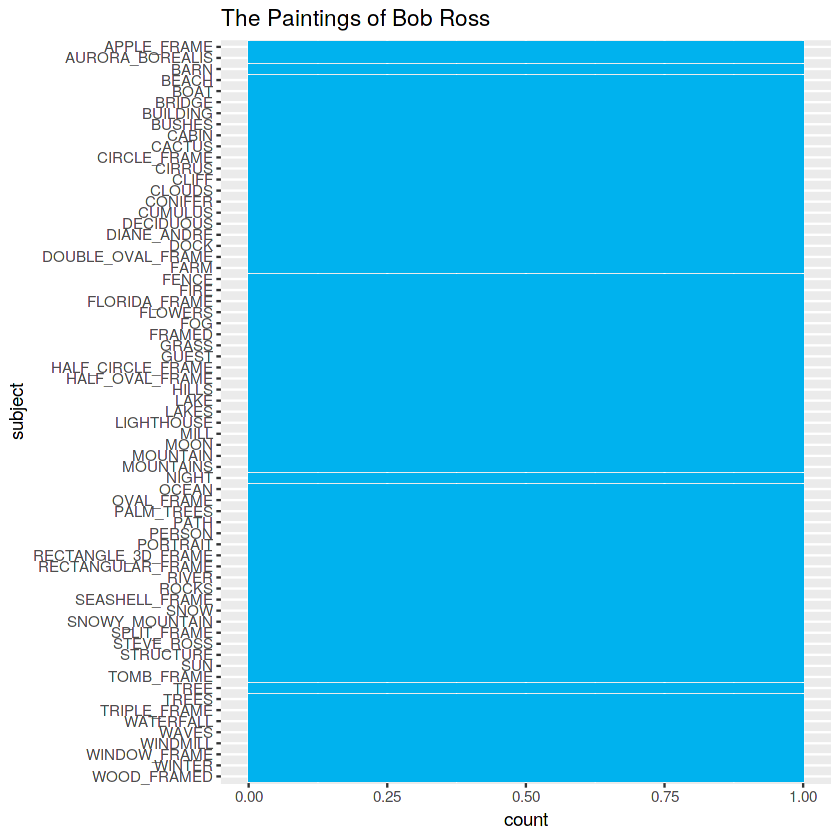

In [10]:
p = p + ggtitle("The Paintings of Bob Ross")
p

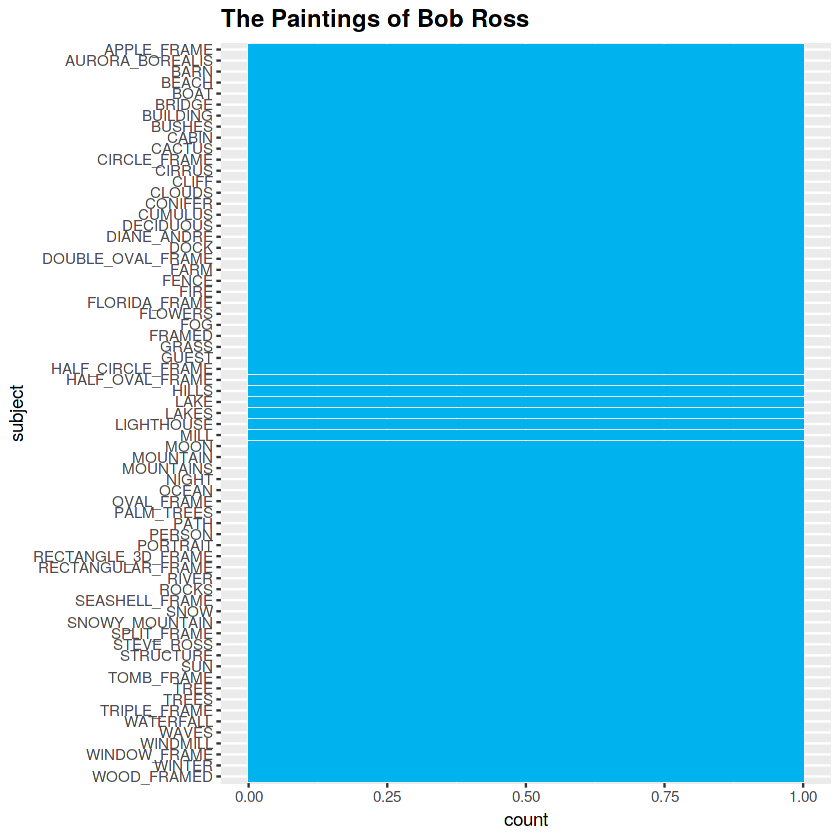

In [11]:
p = p + theme(plot.title = element_text(color="black", size=14, face="bold"))

p





ERROR while rich displaying an object: Error: geom_text requires the following missing aesthetics: y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9

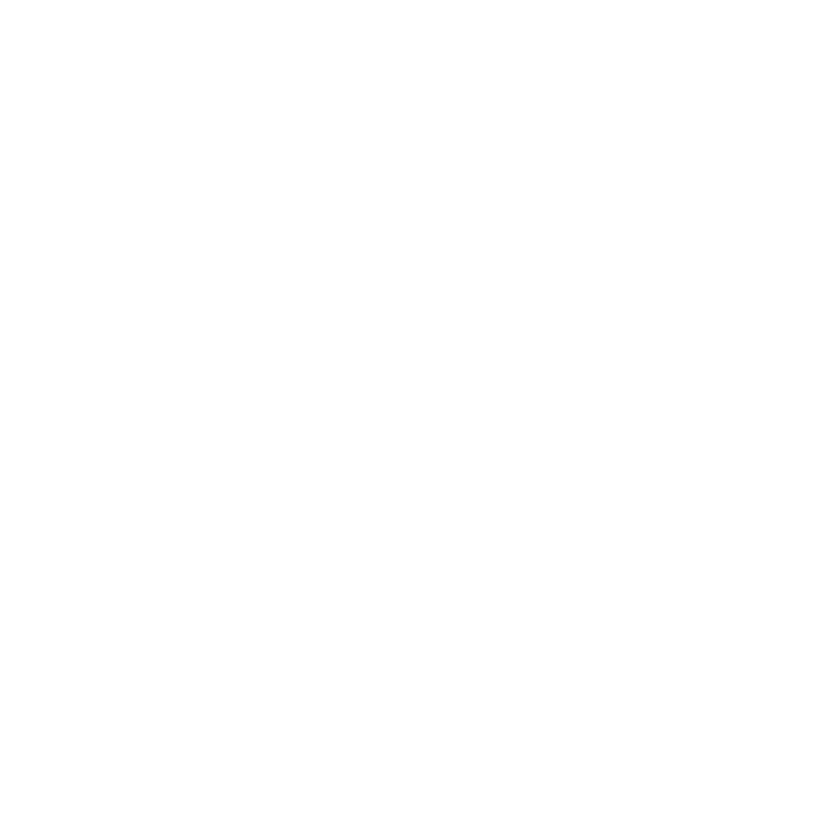

In [12]:
p = p + geom_text(aes(label=total), size=3.5)

p

ERROR while rich displaying an object: Error: geom_text requires the following missing aesthetics: y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9

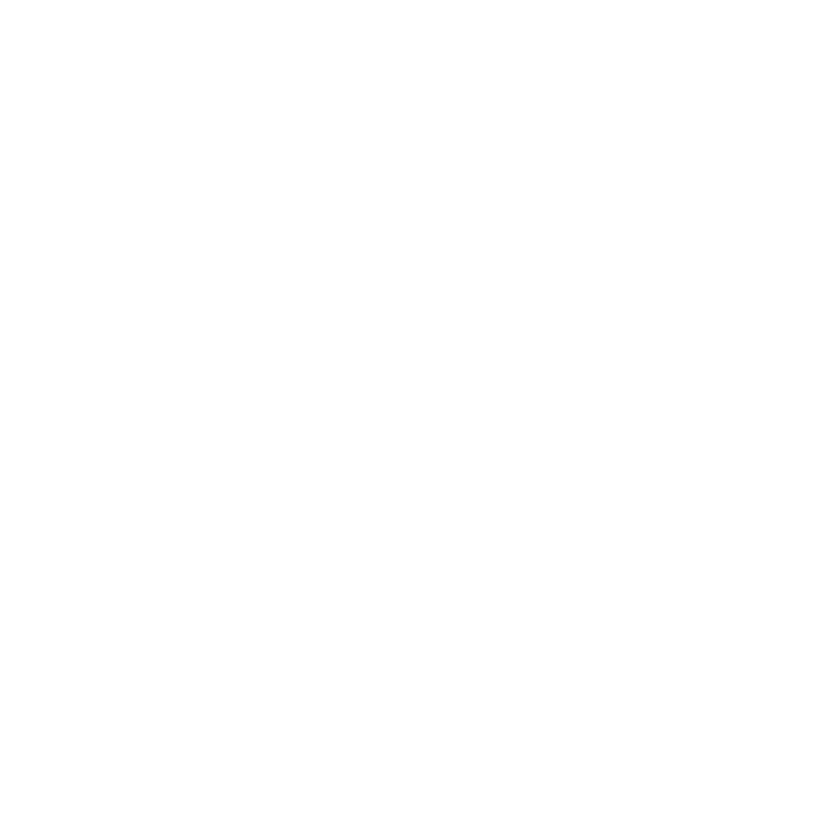

In [13]:
p = p + stat_identity()
p

In [14]:
# trying without summarizing

df4b = df3 %>%  group_by(subject)

head(df4b)


# use forcats to order factors and to lump together every subject less than top 10
df5b = df4b %>% mutate(subject2=fct_infreq(subject)  %>%
                    fct_lump(subject, n=10) %>% fct_rev)


head(df5b, n=25)

levels(subject_factor)


EPISODE,TITLE,subject,subject_count,subject_factor
<chr>,<chr>,<chr>,<dbl>,<fct>
S01E01,"""A WALK IN THE WOODS""",APPLE_FRAME,0,APPLE_FRAME
S01E01,"""A WALK IN THE WOODS""",AURORA_BOREALIS,0,AURORA_BOREALIS
S01E01,"""A WALK IN THE WOODS""",BARN,0,BARN
S01E01,"""A WALK IN THE WOODS""",BEACH,0,BEACH
S01E01,"""A WALK IN THE WOODS""",BOAT,0,BOAT
S01E01,"""A WALK IN THE WOODS""",BRIDGE,0,BRIDGE


Warning message in mutate_impl(.data, dots, caller_env()):
“Unequal factor levels: coercing to character”
Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”
Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”
Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”
Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”
Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”
Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”
Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character

EPISODE,TITLE,subject,subject_count,subject_factor,subject2
<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>
S01E01,"""A WALK IN THE WOODS""",APPLE_FRAME,0,APPLE_FRAME,APPLE_FRAME
S01E01,"""A WALK IN THE WOODS""",AURORA_BOREALIS,0,AURORA_BOREALIS,AURORA_BOREALIS
S01E01,"""A WALK IN THE WOODS""",BARN,0,BARN,BARN
S01E01,"""A WALK IN THE WOODS""",BEACH,0,BEACH,BEACH
S01E01,"""A WALK IN THE WOODS""",BOAT,0,BOAT,BOAT
S01E01,"""A WALK IN THE WOODS""",BRIDGE,0,BRIDGE,BRIDGE
S01E01,"""A WALK IN THE WOODS""",BUILDING,0,BUILDING,BUILDING
S01E01,"""A WALK IN THE WOODS""",BUSHES,1,BUSHES,BUSHES
S01E01,"""A WALK IN THE WOODS""",CABIN,0,CABIN,CABIN


ERROR: Error in levels(subject_factor): object 'subject_factor' not found


ERROR while rich displaying an object: Error: stat_count() must not be used with a y aesthetic.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. pas

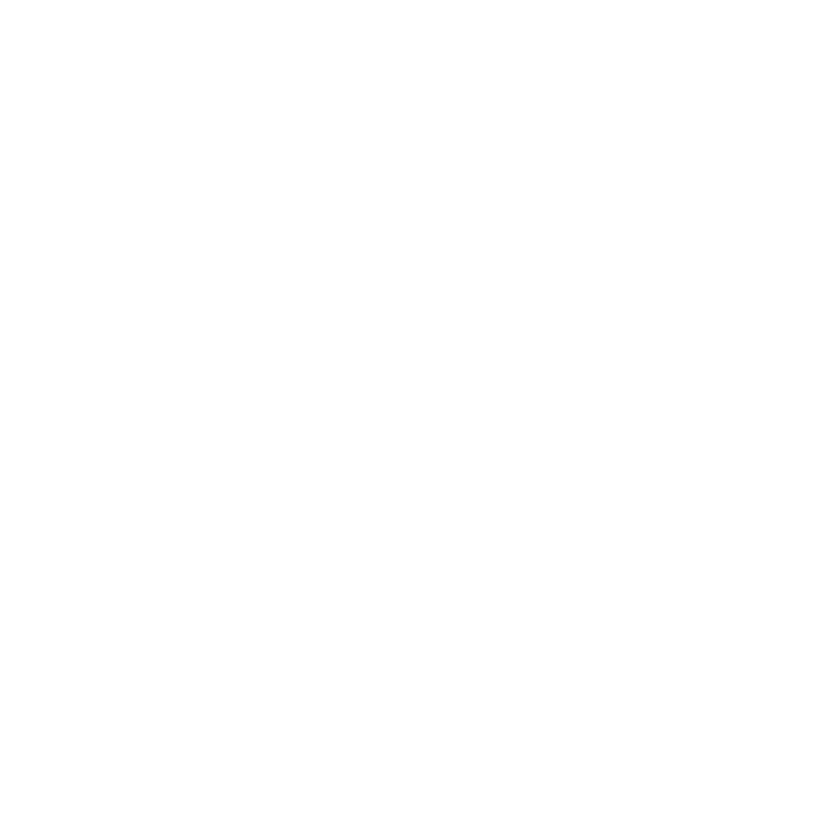

In [15]:
p = ggplot(df5, aes(x = subject, y=total))

p = p + geom_bar(fill='deepskyblue2') + coord_flip()

p

In your version of this figure,

1. **Don't worry about using the variable names exactly as in the article (_i.e._ just use the column names from the original data).**
1. **Plot counts instead of percentages.**
1. **Only show the top ten categories by count and group the remaining categories into a category named 'Other'.** 